In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import sys
sys.path.append('..')

In [3]:
!pip install audiomentations

In [3]:
import os
from matplotlib import pyplot as plt
import numpy as np
import librosa
import uuid
from tqdm import tqdm
from IPython.display import Audio
from scipy.io import wavfile 

In [4]:
from audiomentations import (
    AddGaussianNoise, 
    AddGaussianSNR, 
    BandPassFilter, 
    Compose, 
    ClippingDistortion, 
    PolarityInversion, 
)

# Processing Functions

In [67]:
DATA_PATH = os.path.join('../', 'data', 'aisf', 'augmented', 'train')
AMAN = os.path.join(DATA_PATH, 'aman', 'aman_1.wav')
JAKE = os.path.join(DATA_PATH, 'jake', 'jake_1.wav')
SHAFQAT = os.path.join(DATA_PATH, 'shafqat', 'shafqat_1.wav')
SAMPLE_RATE=48000

In [61]:
def get_melspectrogram_db(file_path, sr=48000, n_fft=2048, hop_length=512, n_mels=128, fmin=20, fmax=8300, top_db=80, sec=5):
    wav,sr = librosa.load(file_path,sr=sr)
    if wav.shape[0]<sec*sr:
        wav=np.pad(wav,int(np.ceil((sec*sr-wav.shape[0])/2)),mode='reflect')
    
    wav=wav[:sec*sr]
    
    spec=librosa.feature.melspectrogram(
        y=wav, sr=sr, n_fft=n_fft,
        hop_length=hop_length,n_mels=n_mels,fmin=fmin,fmax=fmax
    )
    spec_db=librosa.power_to_db(spec,top_db=top_db)
    
    return spec_db

def spec_to_image(spec, eps=1e-6):
    mean = spec.mean()
    std = spec.std()
    spec_norm = (spec - mean) / (std + eps)
    spec_min, spec_max = spec_norm.min(), spec_norm.max()
    
    spec_scaled = (spec_norm - spec_min) / (spec_max - spec_min)
    spec_scaled = spec_scaled.astype(np.float32)
#     spec_scaled = tf.expand_dims(spec_scaled, axis=2)
    return spec_scaled

def get_spec(wav, sr=48000, n_fft=2048, hop_length=512, n_mels=128, fmin=20, fmax=8300, top_db=80, sec=5):
    wav=wav[:sec*sr]
    
    spec=librosa.feature.melspectrogram(
        y=wav, sr=sr, n_fft=n_fft,
        hop_length=hop_length,n_mels=n_mels,fmin=fmin,fmax=fmax
    )
    spec_db=librosa.power_to_db(spec,top_db=top_db)
    
    return spec_db

def transform_audio(file_name, sr=48000):
    audio, _ = librosa.load(file_name, sr=sr)
    
    transform = Compose([
        AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.02, p=0.5),
        AddGaussianSNR(p=0.5),
        ClippingDistortion(p=0.5),
        PolarityInversion(p=0.25),
        BandPassFilter(p=0.25)
    ])
    taudio = transform(audio, sample_rate=sr)
    
    return taudio

def display_audio_image(filename, sr=48000):
    s = get_melspectrogram_db(filename)
    plt.figure()
    plt.imshow(S)
    plt.show()

def display_audio(filename):
    audio, sr = librosa.load(filename)
    display(Audio(audio, rate=sr))

def generate_duplicate_wav(filepath, label, sr=48000, augmented=True, num_of_duplicates=300):
    for i in tqdm(range(num_of_duplicates), f"Generating wav duplicates of wavfile({filepath})..."):
        if augmented:
            audio = transform_audio(filepath)
        else:
            audio, _ = librosa.load(filepath, sr=sr)

        new_filename = f"{label}_{uuid.uuid4().hex}.wav"
        new_filepath = os.path.join(DATA_PATH, label, new_filename)
        wavfile.write(new_filepath, sr, audio)

In [62]:
aman_spec = get_melspectrogram_db(str(AMAN))
jake_spec = get_melspectrogram_db(str(JAKE))
shaf_spec = get_melspectrogram_db(str(SHAFQAT))

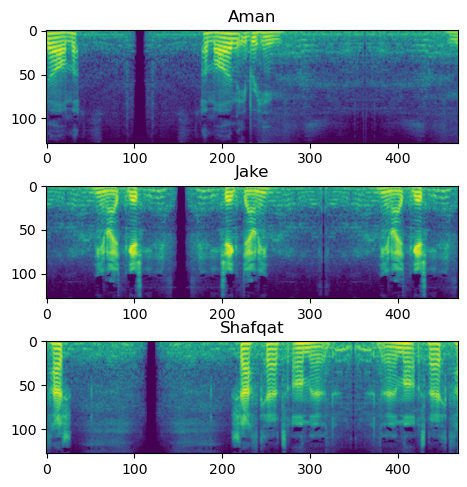

In [63]:
fig, ax = plt.subplots(3, 1)
fig.tight_layout(pad=1.0)
ax[0].imshow(aman_spec)
ax[0].set_title("Aman")
ax[1].imshow(jake_spec)
ax[1].set_title("Jake")
ax[2].imshow(shaf_spec)
ax[2].set_title("Shafqat")
plt.show()

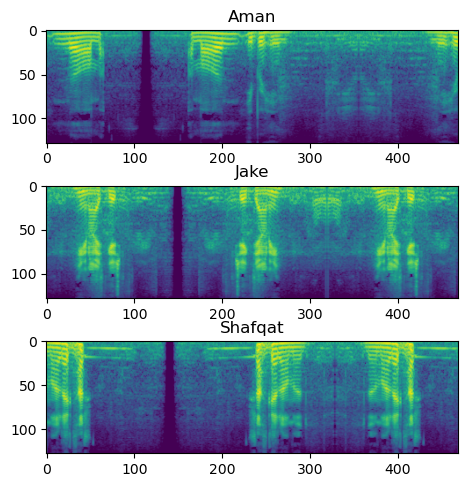

In [47]:
fig, ax = plt.subplots(3, 1)
fig.tight_layout(pad=1.0)
ax[0].imshow(aman_spec)
ax[0].set_title("Aman")
ax[1].imshow(jake_spec)
ax[1].set_title("Jake")
ax[2].imshow(shaf_spec)
ax[2].set_title("Shafqat")
plt.show()

In [64]:
display_audio(str(AMAN))
display_audio(str(JAKE))
display_audio(str(SHAFQAT))

In [68]:
labels = os.listdir(DATA_PATH)

In [52]:
labels

['shafqat', 'aman', 'jake']

In [69]:
for label in labels:
    files = os.listdir(os.path.join(DATA_PATH, label))
    for file in files:
        filepath = os.path.join(DATA_PATH, label, file)
#         audio, _ = librosa.load(filepath, sr=SAMPLE_RATE)
#         taudio = transform_audio(filepath)
#         display(Audio(taudio, rate=SAMPLE_RATE))
        generate_duplicate_wav(filepath, label, augmented=True, num_of_duplicates=200)
#         print(f"{filepath}\n{audio}")

Generating wav duplicates of wavfile(../data/aisf/augmented/train/shafqat/shafqat_6.wav)...: 100%|██████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 185.91it/s]
Generating wav duplicates of wavfile(../data/aisf/augmented/train/shafqat/shafqat_7.wav)...: 100%|██████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 151.22it/s]
Generating wav duplicates of wavfile(../data/aisf/augmented/train/shafqat/shafqat_5.wav)...: 100%|██████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 232.18it/s]
Generating wav duplicates of wavfile(../data/aisf/augmented/train/shafqat/shafqat_4.wav)...: 100%|██████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 254.77it/s]
Generating wav duplicates of wavfile(../data/aisf/augmented/train/shafqat/shafqat_1.wav)...: 100%|██████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 250.58it/s]
Generating wav duplicates of wavfile(../

In [70]:
for label in labels:
    print(f"{label}: {len(os.listdir(os.path.join(DATA_PATH, label)))}")

shafqat: 1407
aman: 1407
jake: 1407
